In [38]:
# Import necessary libraries and download dataset

import pandas as pd  
import os  
import gdown

# gdown.download('https://drive.google.com/uc?id=1nDjHLBMBZ3THSck1Ah3XyhgtRHIBT2Ec', 'dekho.csv', True)

from google.cloud import storage

def download_public_file(bucket_name, source_blob_name, destination_file_name):
    """Downloads a public blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2a - Linear Regression/car_dekho.csv','dekho.csv')

Downloaded public blob Data/AI Scholars/Sessions 1 - 5/Session 2a - Linear Regression/car_dekho.csv from bucket inspirit-ai-data-bucket-1 to dekho.csv.


In [39]:
data_path  = 'dekho.csv'
car_data = pd.read_csv(data_path)

In [41]:
car_data.head() 

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [42]:
print(len(car_data))
print("\nSeller Type: \n{} \n ".format(car_data["Seller_Type"].value_counts()))
print("Fuel Type: \n{} \n".format(car_data["Fuel_Type"].value_counts()))
print("Transmission: \n{} \n".format(car_data["Transmission"].value_counts()))

301

Seller Type: 
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 
 
Fuel Type: 
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Transmission: 
Manual       261
Automatic     40
Name: Transmission, dtype: int64 



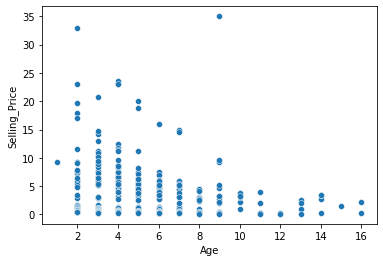

In [44]:
# Plot features against selling price. 

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


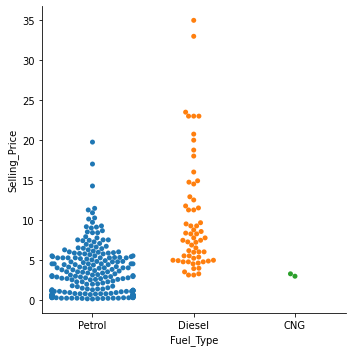

In [45]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm')

In [46]:
car_data.groupby('Fuel_Type').count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


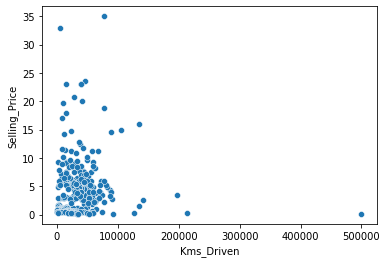

In [48]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = car_data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


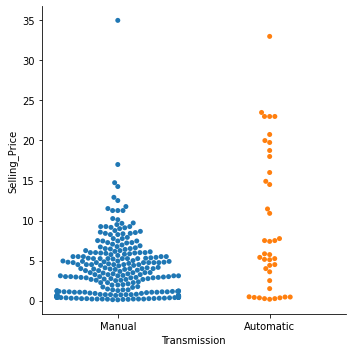

In [49]:
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind = 'swarm')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


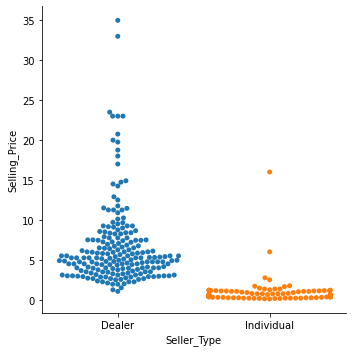

In [50]:
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data, kind = 'swarm')

In [51]:
# Assign numerical values for categorical features

car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})
car_data['Fuel_Type_Number'] = car_data['Fuel_Type'].replace({'CNG': 2, 'Petrol':1, 'Diesel':0})
car_data['Seller_Type_Number'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})

In [76]:
# Split dataset into training and test sets. Implement one-hot encoding for categorical features. 

from sklearn.model_selection import train_test_split

car_data_train, car_data_test = train_test_split(car_data, random_state = 42, test_size = 0.2)

X = car_data[["Age", "Kms_Driven", "Seller_Type_Number", "TransmissionNumber"]]
y = car_data["Selling_Price"]

X_train = car_data_train[["Age", "Kms_Driven", "Seller_Type_Number", "TransmissionNumber"]]
y_train = car_data_train["Selling_Price"]
X_test = car_data_test[["Age", "Kms_Driven", "Seller_Type_Number", "TransmissionNumber"]]
y_test = car_data_test["Selling_Price"]

X_train_dummies = pd.get_dummies(car_data_train[['Age', 'Kms_Driven',	'Fuel_Type',	'Transmission']])
X_train_dummies.drop('Fuel_Type_CNG', inplace= True, axis = 1)

X_test_dummies = pd.get_dummies(car_data_test[['Age', 'Kms_Driven',	'Fuel_Type',	'Transmission']])

In [53]:
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X shape: (301, 4)
y shape: (301,)
X_train shape: (240, 4)
y_train shape: (240,)


In [54]:
# Build Random Forest Model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators= 130, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {}".format(forest.score(X_train, y_train)))
print("Accuracy on testing set: {}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9180688071763698
Accuracy on testing set: 0.6425150140674428


In [55]:
# Build Random Forest Model. Assess with Cross-Validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
forest = RandomForestRegressor(n_estimators= 120, random_state=0)

scores = cross_val_score(forest, X, y, cv = shuffle_split)
print("Cross-validation scores: {}\n".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.64510165  0.57303843  0.48152511  0.23554648  0.5782146  -0.25225782
  0.37739195  0.61762973  0.59994682  0.42378767]

Average cross-validation score: 0.43


In [56]:
# Gradient-Boosted Regression Tree. Random Forest is quite poor. 

from sklearn.ensemble import GradientBoostingRegressor

shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
forest = GradientBoostingRegressor(n_estimators= 120, learning_rate = 0.1, max_depth = 3, random_state=0)

scores = cross_val_score(forest, X, y, cv = shuffle_split)
print("Cross-validation scores: {}\n".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.19240755  0.41150323  0.65859717  0.28510568 -0.3732552   0.59485828
  0.52363089  0.51954658  0.38333156  0.64333452]

Average cross-validation score: 0.38


In [57]:
# Better performance, but remains poor. We will explore GridSearch with Cross-Validation to find the best parameters. 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 100],'learning_rate': [0.01, 0.1, 1, 10], 'max_depth' : [2, 3, 4]}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.51


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [77]:
# Prepare one-hot encoding of categorical features for linear regression model. 
print(X_train_dummies.shape)
X_train_dummies.head()

(240, 6)


,Age,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
184,11,26000,0,1,0,1
132,2,3500,0,1,0,1
194,11,50000,0,1,0,1
75,4,36000,0,1,0,1
111,3,8700,0,1,0,1


In [78]:
X_test_dummies.head()

,Age,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
177,3,24000,0,1,1,0
289,3,10980,0,1,0,1
228,7,60000,1,0,0,1
198,8,35000,0,1,0,1
60,6,40001,0,1,0,1
9,4,42367,1,0,0,1
118,4,26000,0,1,0,1
154,5,8000,0,1,0,1
164,3,14000,0,1,0,1
33,5,45000,1,0,0,1


In [81]:
# Implement Pipeline for pre-processing and grid search on Ridge Regression. 

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(), Ridge())

param_grid = {"ridge__alpha" : [10, 100, 1000, 10000], "polynomialfeatures__degree" : [3, 4, 5]}

grid = GridSearchCV(pipe, param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train_dummies, y_train)

print("Test set score: {:.2f}".format(grid.score(X_test_dummies, y_test)))

Test set score: 0.59


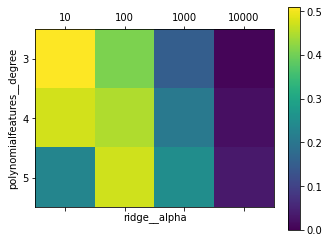

In [82]:
# Plot Grid Search Results

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
 vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")

plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
 param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [84]:
# Repeat the process. Heat map suggests accuracy is optimized around alpha = 10 and degree = 3. Accuracy remains low. 

from sklearn.linear_model import LinearRegression

pipe = make_pipeline(StandardScaler(), LinearRegression())

scores = cross_val_score(pipe, X, y, cv = shuffle_split)
print("Cross-validation scores: {}\n".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.49254543 0.32593661 0.59821865 0.50373648 0.13027226 0.47860147
 0.44095348 0.4679667  0.26083372 0.55993605]

Average cross-validation score: 0.43


In [86]:
# Attempt Kernelized Support Vector Machine. The issue seems to be underfitting, so we will use a much more complex model. 

from sklearn.svm import SVR

pipe = make_pipeline(MinMaxScaler(), SVR())

param_grid = {"svr__gamma" : [0.01, 0.1, 1, 10, 100], "svr__C" : [.01, .1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe, param_grid, cv = 3, n_jobs = -1)
grid.fit(X_train_dummies, y_train)

print("Test set score: {:.2f}".format(grid.score(X_test_dummies, y_test)))

Test set score: 0.64


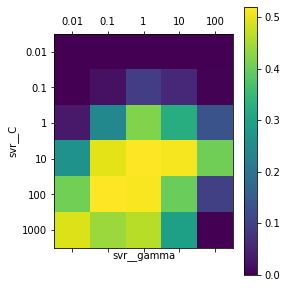

In [89]:
# Plot results

plt.matshow(grid.cv_results_['mean_test_score'].reshape(6, -1),
 vmin=0, cmap="viridis")
plt.xlabel("svr__gamma")
plt.ylabel("svr__C")

plt.xticks(range(len(param_grid['svr__gamma'])), param_grid['svr__gamma'])
plt.yticks(range(len(param_grid['svr__C'])),
 param_grid['svr__C'])
plt.colorbar()

The Kernelized Support Vector Machine model provides the best results. Further finetuning of the parameters is possible. 